In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sqlite3

In [4]:
con = sqlite3.connect(r"password_data.sqlite")

In [5]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [6]:
data.shape

(100000, 3)

In [7]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [8]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

## Data Cleaning

### Checking Irrevelant Columns 

In [9]:
data.drop(["index"], axis=1, inplace= True)

In [10]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


### Checking Duplicate Values

In [11]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [12]:
data.duplicated().sum()

0

### Checking Missing Values

In [13]:
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [14]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [15]:
data.isnull().any().sum()

0

### Checking Irrevelant Rows

In [16]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [17]:
data["strength"].unique()

array([1, 2, 0])

### Semantic Analysis

In [18]:
type(data["password"][0])

str

In [19]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [20]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [21]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [22]:
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [23]:
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [24]:
data[data["password"].str.isalpha()].shape

(50, 2)

In [25]:
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [26]:
data[data["password"].str.isalnum()].shape

(97203, 2)

In [27]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


### Finding rows with special character

In [28]:
import string

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def find_special(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [31]:
data["password"].apply(find_special)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [32]:
data["password"].apply(find_special)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [33]:
data[data["password"].apply(find_special)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


### Feature Engineering

In [34]:
data["length"]=data["password"].str.len()

In [35]:
data.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [36]:
password = "Amol1234"

In [37]:
[char for char in password if char.islower()]

['m', 'o', 'l']

In [38]:
len([char for char in password if char.islower()])

3

In [39]:
len([char for char in password if char.islower()])/len(password)

0.375

In [40]:
def freq_lowerCase(row):
    return len([char for char in row if char.islower()])/len(row)

In [41]:
def freq_upperCase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [42]:
def freq_numCase(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [43]:
data["password"].apply(freq_lowerCase)

0        0.333333
1        0.416667
2        0.777778
3        0.782609
4        0.625000
           ...   
99995    0.700000
99996    0.800000
99997    0.777778
99998    0.666667
99999    0.727273
Name: password, Length: 100000, dtype: float64

In [44]:
data["password"].apply(freq_upperCase)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: password, Length: 100000, dtype: float64

In [45]:
data["password"].apply(freq_numCase)

0        0.666667
1        0.583333
2        0.222222
3        0.173913
4        0.375000
           ...   
99995    0.300000
99996    0.200000
99997    0.222222
99998    0.333333
99999    0.272727
Name: password, Length: 100000, dtype: float64

In [46]:
data.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [47]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowerCase),3)
data["uppercase_freq"] = np.round(data["password"].apply(freq_upperCase),3)
data["digit_freq"] = np.round(data["password"].apply(freq_numCase),3)

In [48]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [49]:
def freq_specialCase(row):
    specialChar = []
    for char in row:
        
        if not char.isalpha() and not char.isdigit():
            specialChar.append(char)
    return len(specialChar)/len(row)

In [50]:
data["special_char_freq"] = np.round(data["password"].apply(freq_specialCase), 3)

In [51]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


### Data Analysis

In [52]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [53]:
data[["length","strength"]]

,length,strength
0,9,1
1,12,1
2,9,1
3,23,2
4,8,1
...,...,...
99995,10,1
99996,10,1
99997,9,1
99998,9,1


In [54]:
data[["length","strength"]].groupby(["strength"]).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

### Feature Importance

In [55]:
cols = ['length', 'lowercase_freq', 'uppercase_freq','digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col,"strength"]].groupby(["strength"]).agg(["min","max","mean","median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [56]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

<Axes: xlabel='strength', ylabel='special_char_freq'>

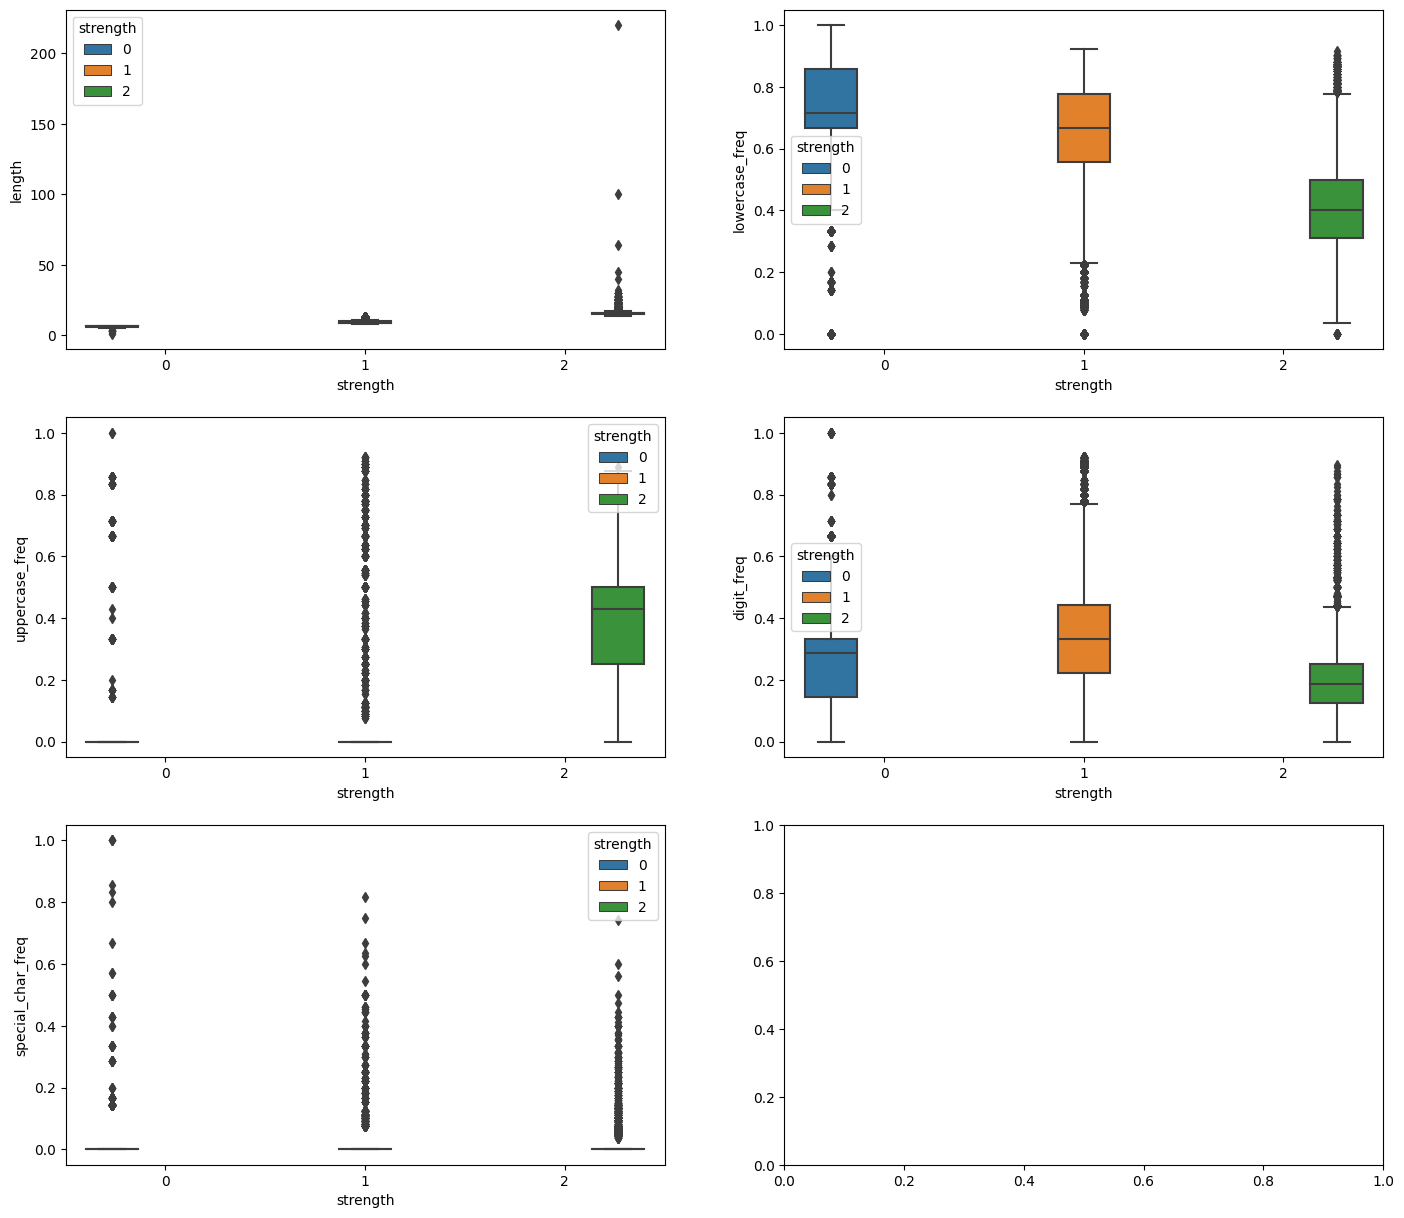

In [57]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))= plt.subplots(3,2, figsize=(17,15))
sns.boxplot(x="strength", y="length", hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength", y="lowercase_freq", hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength", y="uppercase_freq", hue="strength", ax=ax3, data=data)
sns.boxplot(x="strength", y="digit_freq", hue="strength", ax=ax4, data=data)
sns.boxplot(x="strength", y="special_char_freq", hue="strength", ax=ax5, data=data)

### Feature Engineering


In [58]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [59]:
def get_dist(data, feature):
    plt.subplot(1,2,1)
    sns.violinplot(x="strength", y=feature, data=data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data["strength"]==0][feature], color="red", label = "0", hist="False")
    sns.distplot(data[data["strength"]==1][feature], color="green", label = "0", hist="False")
    sns.distplot(data[data["strength"]==2][feature], color="blue", label = "0", hist="False")
    plt.legend()
    plt.show()

In [60]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

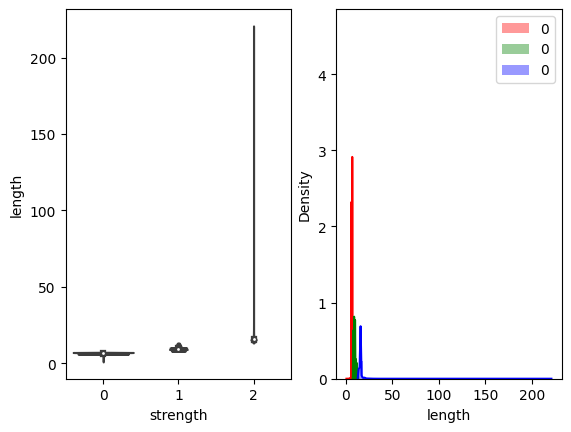

In [61]:
get_dist(data,"length")

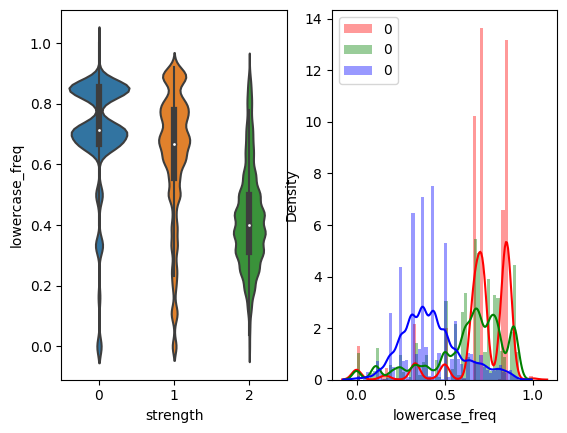

In [62]:
get_dist(data,"lowercase_freq")

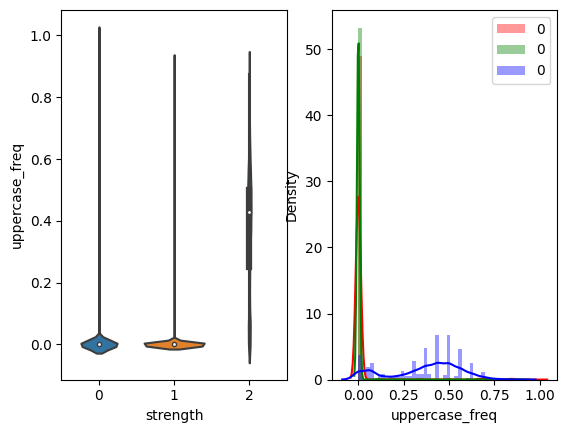

In [63]:
get_dist(data,"uppercase_freq")

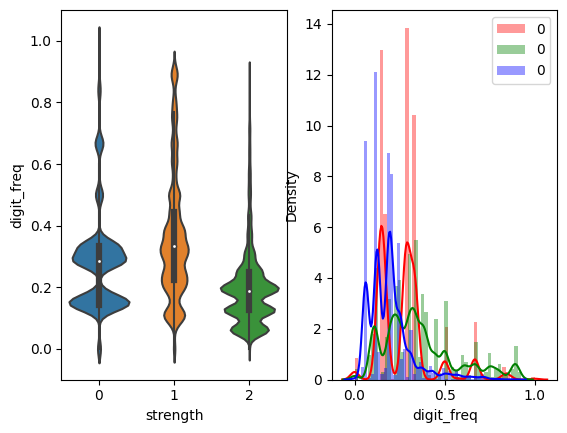

In [64]:
get_dist(data,"digit_freq")

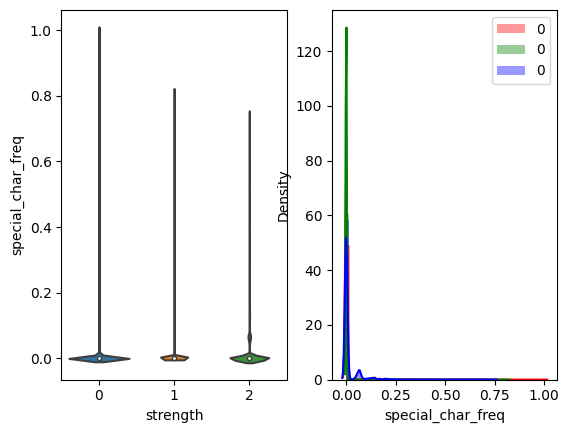

In [65]:
get_dist(data,"special_char_freq")

 ### TF-IDF to convert stringdata into vector representation

In [66]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000


### Shuffle data 

In [67]:
dataframe = data.sample(frac=1)

In [68]:
dataframe["password"]

117             1tlsiddeu
23139              XAM111
5247           anismith78
90285           ykevir976
93807          itrepune48
               ...       
59591            gdc20010
96412           gui131619
48467    CXmh3NzUzOALDgZ4
42346              4/4/97
14815            goez1088
Name: password, Length: 100000, dtype: object

In [69]:
x =list(dataframe["password"])

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
vectorizer = TfidfVectorizer(analyzer = "char")

In [72]:
X = vectorizer.fit_transform(x)

In [73]:
X.shape

(100000, 99)

In [74]:
dataframe["password"].shape

(100000,)

In [75]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [76]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2264916 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.65706606, 0.25551746, 0.        , 0.        , 0.        ,
       0.26477906, 0.        , 0.        , 0.31453377, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.29717016, 0.30931037, 0.31409256, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [78]:
dataframe["password"]

117             1tlsiddeu
23139              XAM111
5247           anismith78
90285           ykevir976
93807          itrepune48
               ...       
59591            gdc20010
96412           gui131619
48467    CXmh3NzUzOALDgZ4
42346              4/4/97
14815            goez1088
Name: password, Length: 100000, dtype: object

In [79]:
vectorizer.get_feature_names_out()

#Features on which TF-IDF values are assigned

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [80]:
len(vectorizer.get_feature_names_out())

99

In [81]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df2 =pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [83]:
df2.head(1)

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Building

In [84]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [85]:
df2["length"] = dataframe["length"]
df2["lowercase_freq"] = dataframe["lowercase_freq"]

In [86]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [87]:
y = dataframe["strength"]

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df2, y , test_size = 0.20)

In [90]:
X_train.shape

(80000, 101)

In [91]:
y_train.shape

(80000,)

In [92]:
X_test.shape

(20000, 101)

In [93]:
y_test.shape

(20000,)

In [95]:
from sklearn.linear_model import LogisticRegression

In [98]:
clf =LogisticRegression(multi_class = "multinomial")
#multi_class = "multinomial" when we have 3 or more independent class

In [99]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [100]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [101]:
y_pred = clf.predict(X_test)

In [102]:
from collections import Counter

In [103]:
Counter(y_pred)

Counter({1: 16676, 2: 1810, 0: 1514})

### Prediction on user input sample

In [111]:
def predict():
    password = input("Enter Password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_password = len(password)
    length_normalized_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix = np.append(sample_matrix.toarray(), (length_password, length_normalized_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix)
    
    if result == 0:
        return "Weak Password"
    elif result == 1:
        return "Normal Password"
    else:
        return "Strong Password"

In [112]:
predict()

Enter Password : hello@123


'Strong Password'

In [113]:
predict()

Enter Password : hello


'Weak Password'

### Checking Accuracy

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [116]:
accuracy_score(y_test, y_pred)

0.79895

In [118]:
confusion_matrix(y_test, y_pred)
#diagonal values are the correctly predicted
#  0 1 2 Predicted values
#0
#1
#2
#Actual result

array([[  801,  2004,     0],
       [  654, 13710,   342],
       [   59,   962,  1468]])

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.29      0.37      2805
           1       0.82      0.93      0.87     14706
           2       0.81      0.59      0.68      2489

    accuracy                           0.80     20000
   macro avg       0.72      0.60      0.64     20000
weighted avg       0.78      0.80      0.78     20000

